# **Phase 3: Top**
---

#### *Most Vulnerable at the Top*
### **Long | Levered | Overpriced** -> Central Bank Tightens Policy (Raise Interest Rates)
- Income Falls -> Wealth Falls ->  Spending Drops
- Credit-Worthyness Weakens -> Lending Constricted -> Investmens Fall -> Selling Out 

> Asset Prices Fall -> Negative "Wealth Effect" 
> - Risky Investments Go First 
> - "Wealth Effect" of asset price movement has a bigger impact on economic growth rates than monetary policy
> 
> Lenders Raise Credit Standards (while borrower's credit-worhtyness declines)
> - Credit Spreads Widen 
> 
>> Short Rates Rise -> Narrowing Spread Between Long Rates 
>> - *Yield Curve Flattens or Inverts* (SR Higher than LR) 
>> - holding cash becomes more attractive 
>> 
>> Short Rates PEAK a few months prior to top of the market 
> 
> Higher Leverage = Bigger Busts 
> - downturns depenedent on market sector + leverage utilized 
> - overall market too broad to anticipate damage 

#### import [d_cycle.py](d_cycle.py) and `fredapi` 

In [1]:
import os
import d_cycle as dc
from fredapi import Fred

api_key = os.environ.get("FRED_API_KEY")
fred = Fred(api_key=api_key)

2008 Bubble Start: 2002-01-01
2008 Bubble End: 2009-01-01
2008 Top Start: 2005-01-01
2008 Top End: 2009-01-01


In [2]:
# Yield Curve 
# https://en.saif.sjtu.edu.cn/junpan/slides/Slides3_Class3.pdf

# Fed Funds Effective Rate (DFF) 

#### US T-BONDS 
# Two (DGS2)
# Five (DGS5)
# Ten (DGS10)
# Twenty (DGS20)
# Thrity (DGS30)

whole_cycle = dc.PLOTTING(start=dc.start_2008, end=dc.end_2008)
top_cycle = dc.PLOTTING(start=dc.top_start_08, end=dc.top_end_08)

# U.S. Treasury Securities Market Yield (Constant Maturity)
---

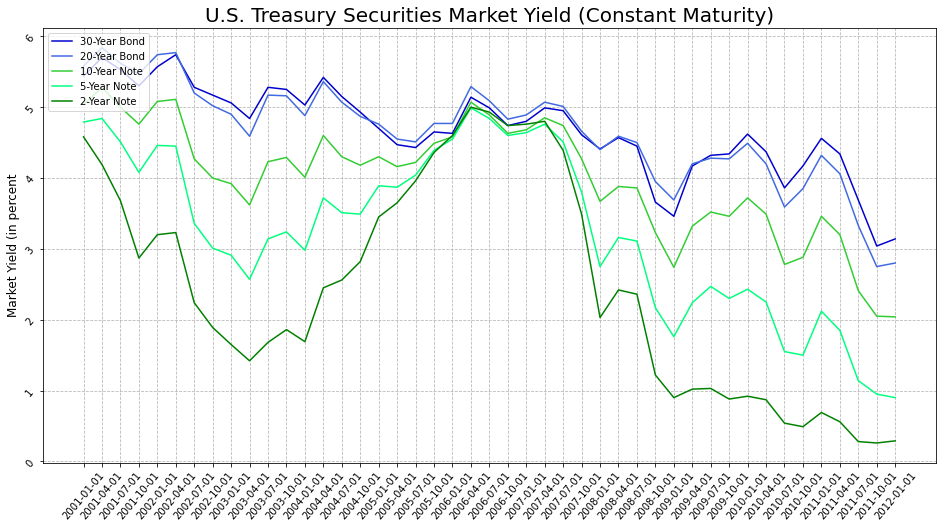

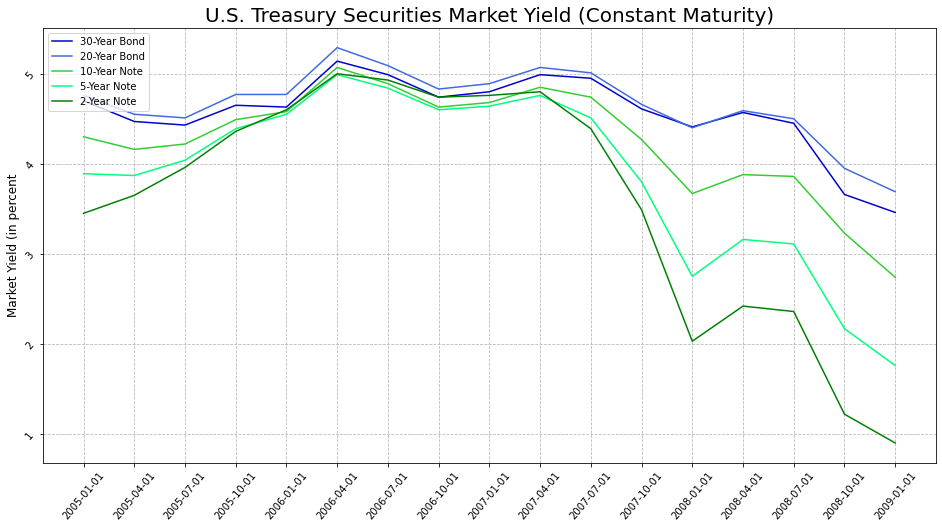

In [3]:
# Treasury Bonds: Maturity above 20yrs
    # fixed interest rate paid semiannually -> principal paid back at end 
# Treasury Notes: Maturity between 2 and 10 years 
    # fixed interest rate paid semiannually -> principal paid back at end 
    
whole_cycle.plot_t_bond_maturity()
top_cycle.plot_t_bond_maturity()

# Yield Curve 
---
### Flattens when Short Rates = Long Rates 
> Short Rates Rise -> Narrowing Spread Between Long Rates 
> - eliminates extra interest earned for lending long term vs. short term 
> - *Yield Curve Flattens or Inverts* (SR Higher than LR) 
> - holding cash becomes more attractive 
>   - raises IR used to discount future cash flows 
>   - weakens riskier assets 
>   - assets bought on credit now more expensive 
> 
> Short Rates PEAK a few months prior to top of the market 

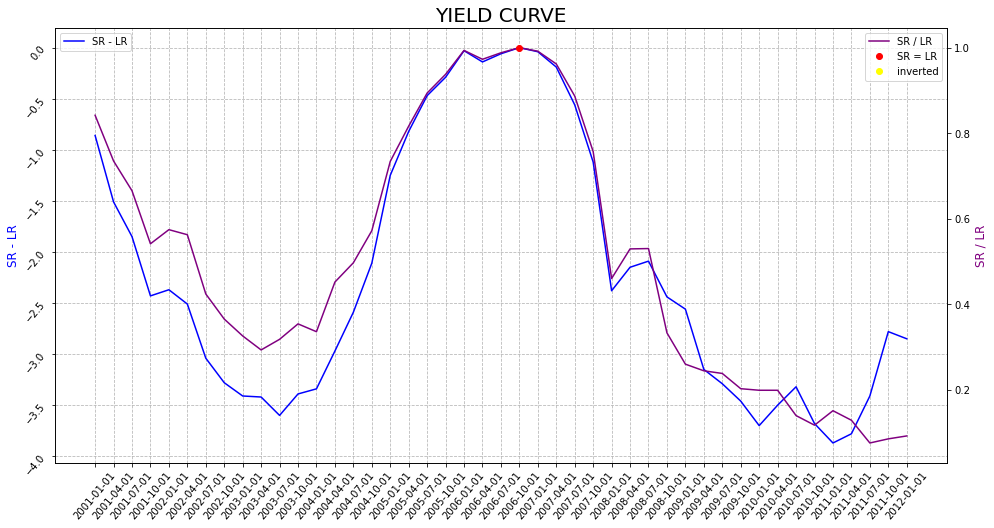

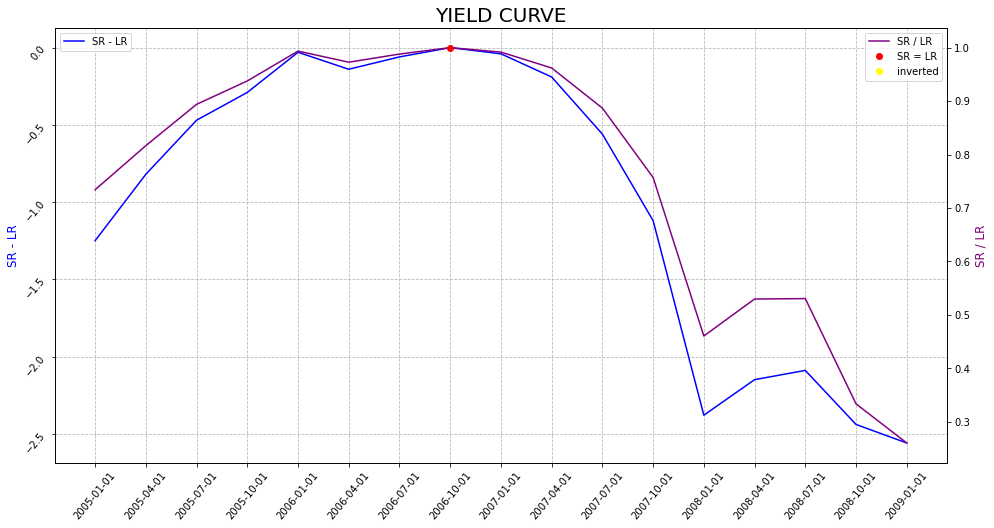

In [4]:
whole_cycle.plot_SR_LR()
top_cycle.plot_SR_LR()

# Equity Price (Indexed)
- NASDAQ Composite Index 

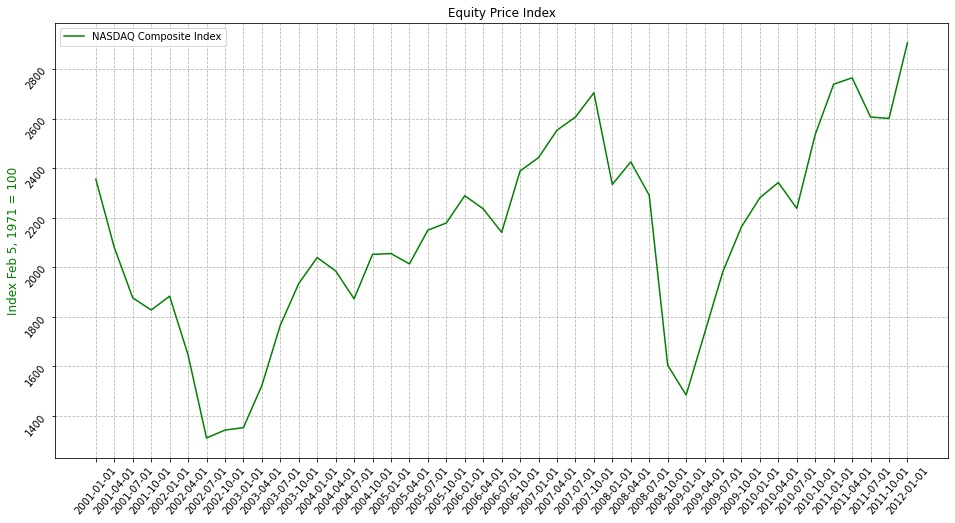

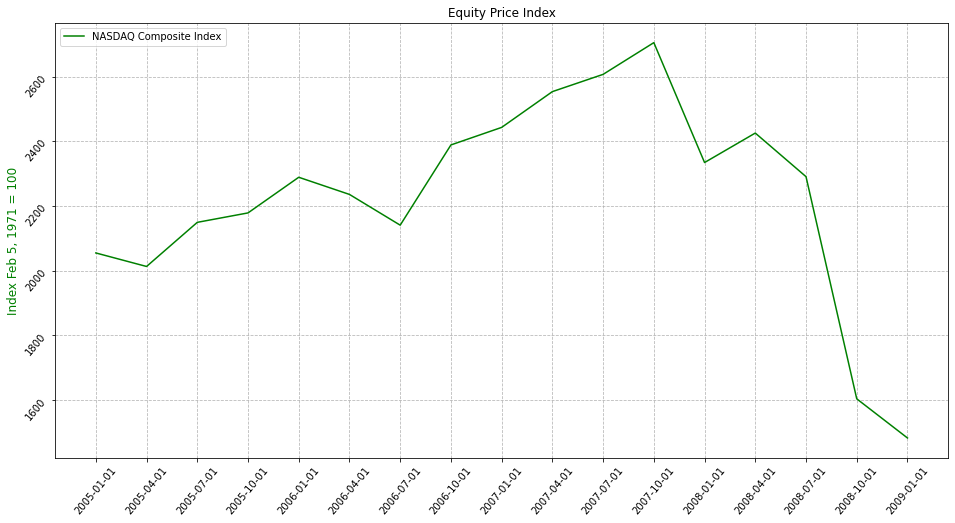

In [5]:
whole_cycle.plot_equity_price_index()
top_cycle.plot_equity_price_index()

# Impacts of Asset Price Changes vs. Policy Changes Moving Economic Growth 
---
### Short Rates Peak a Few Months Prior to Top 
- Wealth Effect of Asset Price Movements Has a Bigger Impace on Economic Growth Rates than Monetary Policy Does 

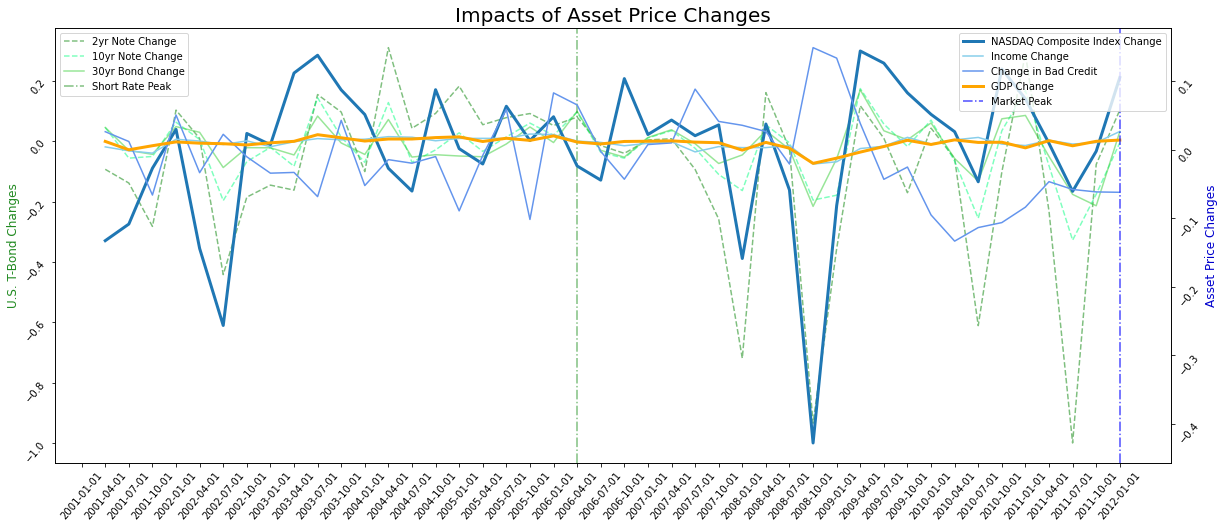

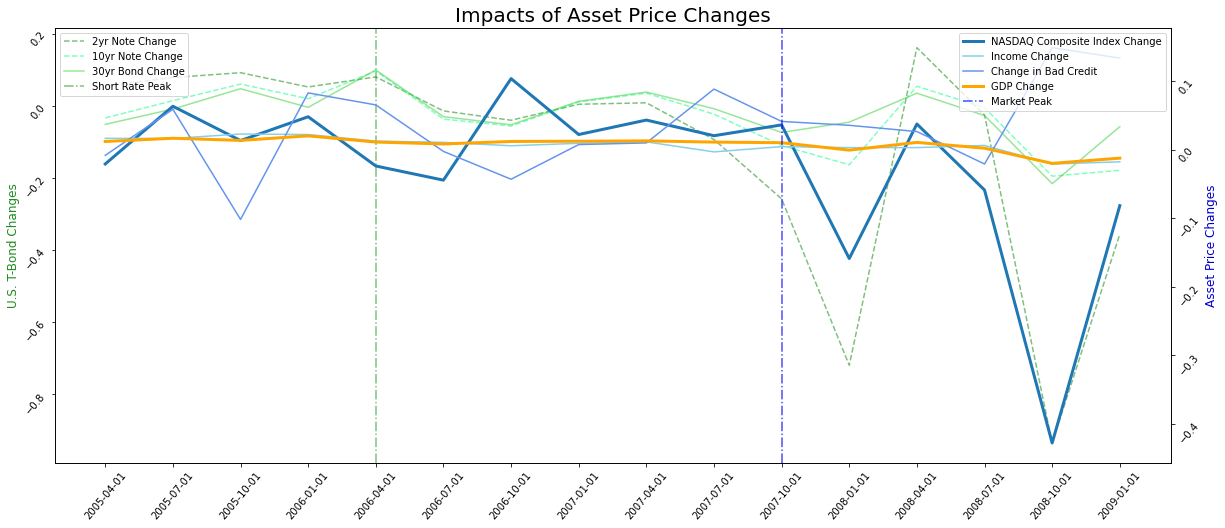

In [6]:
whole_cycle.plot_asset_price_changes()
top_cycle.plot_asset_price_changes()